# Introduction to Artificial Intelligence for Non Computing

## Practical 2 (weeks 3 - 4)

## Search Techniques

The following links provide additional information about depth first search and breath first search

- Depth first search:   link：https://pan.baidu.com/s/1bkLHKKbSBNpfFuKwDyURqw  password：oy76
- Breath first search:  link：https://pan.baidu.com/s/176g5q0W3rGbSAM5tZMraeg   password：7mdh

#### Theory Questions 

1\. What is an algorithm? A sequence of steps such as a recipe or a movie script.

As a movie viewer, please write an algorithm for a process to "see a movie". Include details of the following for example (add additional information yourself):
	- The start conditions 
	-- I want to watch a movie
	- Roles (people/actors involved) 
    --watcher, ticket seller etc 
    -Equipment required ("props")
    --seats, ticket etc
    - The scenes 
    -- scene 1 - buy ticket 
    -- ??? what happens next
    -- scene 3, scene 3 ...
    - Results/outcomes
    -- ?


My answer: Buy tickets, tell girl friend, go to the cinema, and find my seat.

2\. A farmer with his wolf, duck and bag of corn come to the east side of a river they wish to cross. There is a boat at the rivers edge, but of course only the farmer can row. The boat can only hold two things (including the rower) at any one time. If the wolf is ever left alone with the duck, the wolf will eat it. Similarly if the duck is ever left alone with the corn, the duck will eat it. How can the farmer get across the river so that all four arrive safely on the other side? 

My Answer: Firstly, Farmer takes duck to the other side, and then returns alone. Secondly  Farmer takes wolf to the other side, and returns with duck. Thirdly, Farmer takes corn to the other side, and return alone. Finally, Farmer takes duck to the other side. 

3\.Explain why we determine our problem goals before we write the problem formulation (including the model and deciding what algorithm or techniques to use - for example search, or other method).

See Chapter3.1 (Russel & Norvig)

My Answer:
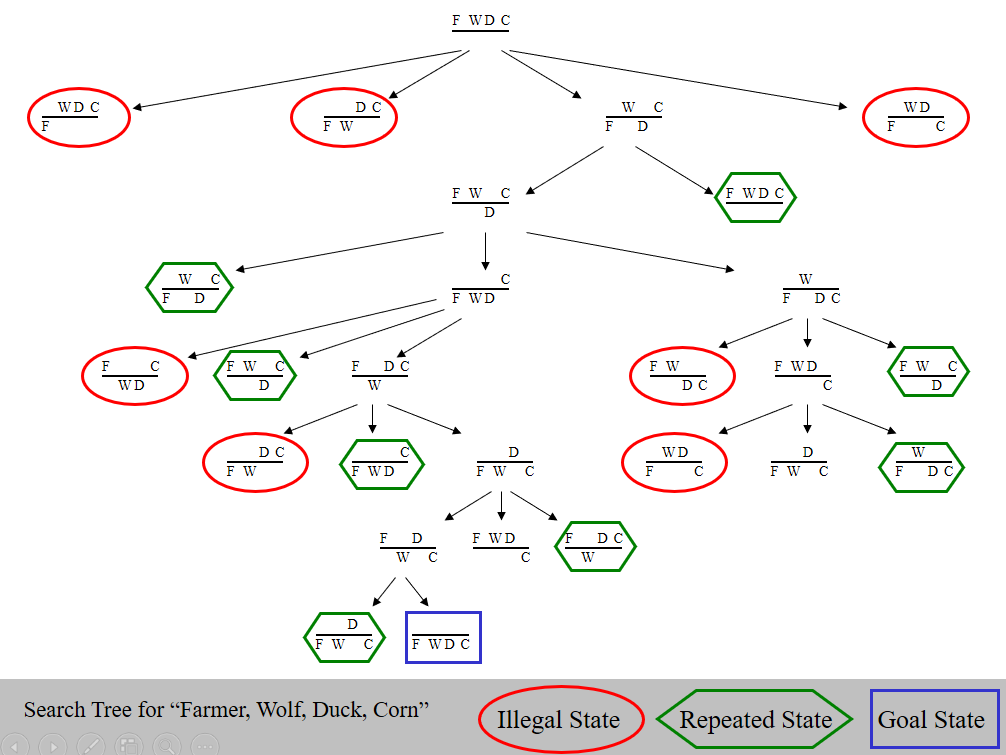

4\. This question requires you to perform BFS and DFS on paper.

<img src="img/p1.png" width="180" height="180" >

1. Simulate (on pencil-and-paper) breadth-first search starting from node A when the goal node is K.
2. Simulate (on pencil-and-paper) depth first search starting from node A when the goal node is I.


1. A,B,C,D,E,F,H,G,I,K
2. A,B,C,E,F,D,G,J,I,K

***

5\.Consider a state space where the start state is number 1 and each state  k has two successors: numbers 2k and 2k + 1.
- a. Draw the portion of the state space for states 1 to 15.
- b. Suppose the goal state is 11. List the order in which nodes will be visited for breadthfirst
search, depth-limited search with limit 3, and iterative deepening search.
- c. How well would bidirectional search work on this problem? What is the branching
factor in each direction of the bidirectional search?
- d. Does the answer to (c) suggest a reformulation of the problem that would allow you to
solve the problem of getting from state 1 to a given goal state with almost no search?
- e. Call the action going from k to 2k Left, and the action going to 2k + 1 Right. Can you
find an algorithm that outputs the solution to this problem without any search at all?

See textbook Chapter3.15

My Answers:
a. 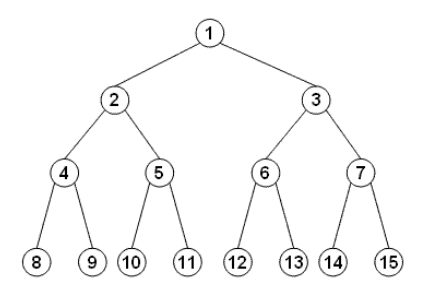
b. BFS: 1→2→3→4→5→6→7→8→9→10→11
   DFS: 1→2→4→8→9→5→10→11 
   IDS: 1; 1→2→3; 1→2→4→5→3→6→7; 1→2→4→8→9→5→10→11
c. Yes. In this problem, the predecessor of each state x is bx2c, which iseasily computable
d. 2 in forward direction, and 1 in backward direction.
e. Yes. We start from goal state, and let node 1, the original start state, be our new goal. For each state i, we have only one next state bx2c. Since the new problem has branching factor=1, we will not need to search.

### Programming Excercises

1\.Write a program to solve a classic ancient Chinese puzzle:  
 We count 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? 

In [5]:
for x in range(1,23):
    y = 35 - x
    if 4*x + 2*(35-x) == 94:
        print ('rabbits:'+ str(x)+'\n'+'chickens:'+ str(y))

rabbits:12
chickens:23


2\. _Social networking_ Please look at the graph below of social relationships. You have a mango farm, you need to find a mango buyer and sell him your mango that you have grown (just a small farm). To this end, our principle is to use our social network of friends separated by one degree, and then second degree friends (friends of friends), third degree friends (friends of friends of friends).

Use the depth first algorithm to search your network until you find a mango seller. 

We make an assumption that if the person's name ends with m, then it means the person must be the mango seller!


<img src="img/p3.png" width="500" height="400" >

In [1]:
class Node(object):
    def __init__(self ,item = None, left=None, right=None):
        self.item = item
        self.left = left
        self.right = right

d = Node("D")
e = Node("E")
b = Node("B", d, e)
f = Node("F")
g = Node("G")
c = Node("C", f, g)
a = Node("A", b, c)

result = []

def deep_search(root):
    result.append(root.item)
    if root.left:
        deep_search(root.left)
    if root.right:
        deep_search(root.right)
    return "-->".join(result)

print (deep_search(a))

A-->B-->D-->E-->C-->F-->G


3\. Depth First traverse：Use depth first traversal to traverse all the DLL files on the C disk and output the file names.

Update your code to search for a particular filename.

What protocol did you use to select the next node to expand on the fringe?

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 10 14:39:56 2018

@author: lyndo
"""
import os.path

def get_all(path):

    L = os.listdir(path)
    for name in L:
        new_path = os.path.join(path, name)
        if os.path.isdir(new_path):
#            print('目录：', new_path)
            get_all(new_path)
        elif(os.path.splitext(new_path)[-1] == ".dll"):
            print('文件：', new_path)
#            get_all(path)

def search(keyword,dir):
    for x in os.listdir(dir):
        if os.path.isfile(x):
            if keyword in os.path.split(x)[1]:
                absdir_name = os.path.abspath(dir)
                file_name = os.path.split(x)[1]
                print (os.path.join(absdir_name,file_name))

    if os.path.isdir(x):
        search(keyword,x)
        
            
if __name__ == '__main__':
    
    path = r'C:\\'
    get_all(path)
    keyword = input('请输出需要查找的关键字：')
    if keyword =='q':
        break

    search(keyword, path)

文件： F:\office2016\office2016激活工具及方法\Vestris.ResourceLib.dll


4\.
Breadth First traverse：Use breadth traversal to traverse all the DLL files on the C disk and output the filename.

Update your code to search for a particular filename.

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  7 02:00:29 2018

@author: lyndo
"""

import os
from collections import deque#从收集模块中导入双端队列
class GuangDu:
    def __init__(self,path):
        "初始化函数，读取的根目录"
        self.path =path 
        self.MyList =deque([])#实例化一个队列
        self.MyList.append(self.path)#把根目录路径放入队列中

    def  BianLi(self):
        "广度遍历的方法实现"
        while len(self.MyList) !=0:#当队列中为空的时候跳出循环
            path =self.MyList.popleft()#从队列中弹出一个路径
            if os.path.isdir(path):#对弹出的path路径判断是否是一个文件夹
                myFilePath =os.listdir(path)#如果是一个文件夹，就把文件夹里面的所有东西添加进列表中，
                for line in myFilePath:#对添加到列表中的东西进行遍历
                    myPath =path +"\\"+line#形成绝对路径，
                    self.MyList.append(myPath)#把遍历的东西都加入到队列中
            elif (os.path.splitext(path)[-1] == ".dll"):#如果是dll文件，直接打印出来，就不用
                print("文件",path)
                
    def search(keyword,dir):
        for x in os.listdir(dir):
            if os.path.isfile(x):
                if keyword in os.path.split(x)[1]:
                    absdir_name = os.path.abspath(dir)
                    file_name = os.path.split(x)[1]
                    print (os.path.join(absdir_name,file_name))

        if os.path.isdir(x):
            search(keyword,x)
    
    

    def __del__(self):
        "最终会执行的函数"
        pass

if __name__ = '__main__':
    path =r"C:\\"#初始的文件目录
    file =GuangDu(path)#实例化一个对象
    file.BianLi()#对象调用方法
    keyword = input('请输出需要查找的关键字：')
    if keyword =='q':
        break

    search(keyword,path)


5\. Uniform cost search

Consider a state space where the start state is 2 and each state k has three successors: numbers 2k, 2k+1, 2k+2. The cost from state k to each respective child is k, ground(k/2), k+2.

can you implement a uniform-cost-search algorithm with python. The goal state is number 85.

6\.a* question

A cute cat stays in the A position, he is hungry. But the food is placed in the B position. Can you help him to find the food? 
Hint:  The problem isn't easy. It's essential for you to understand the A* algorithm before you solve this problem. Then, you can use some thought of Node in java, when you are in code.

<img src="img/p4.png" width="500" height="400" >


In [ ]:
## write your answer here!